# Mask Generation with OpenCV
In the paper they generate irregular masks by using occlusion/dis-occlusion between two consecutive frames of videos, as described in [this paper](https://lmb.informatik.uni-freiburg.de/Publications/2010/Bro10e/sundaram_eccv10.pdf). 

Instead we'll simply be using OpenCV to generate some irregular masks, which will hopefully perform just as well. We've implemented this in the function `random_mask`, which is located in the `util.py` file int he libs directory

In [1]:
import os
import itertools
import matplotlib
import matplotlib.pyplot as plt

# Change to root path
if os.path.basename(os.getcwd()) != 'PConv-Keras':
    os.chdir('..')
    
# Import function that generates random masks
from libs.util import random_mask
from libs.util import load_mask

%matplotlib inline

Let us review of the code of this function

In [2]:
??random_mask

Finally, let's create some output samples with this function to see what it does

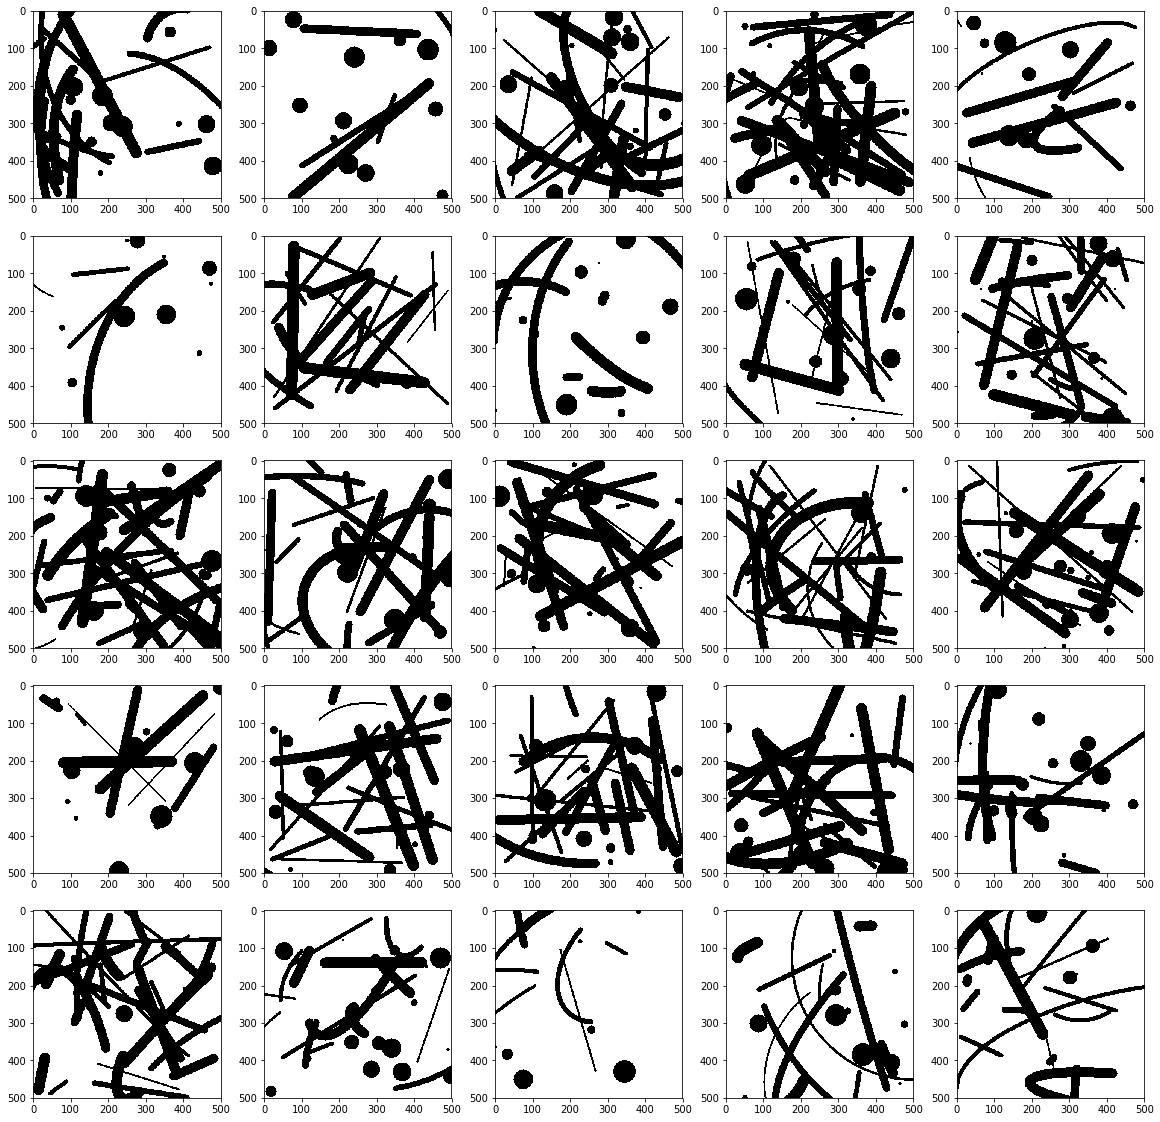

In [3]:
# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = random_mask(500, 500)
    
    # Plot image on axis
    axes[i].imshow(img*255)

I've also implemented a function which will load masks from a directory, and potentially augments them. This can be used to load masks published with the original paper. E.g. get the original training and testing masks from http://masc.cs.gmu.edu/wiki/partialconv, and save them to `data/masks/train/` and `data/masks/test/`, respectively.

In [4]:
train_masks = os.listdir('./data/masks/train')
test_masks = os.listdir('./data/masks/test')

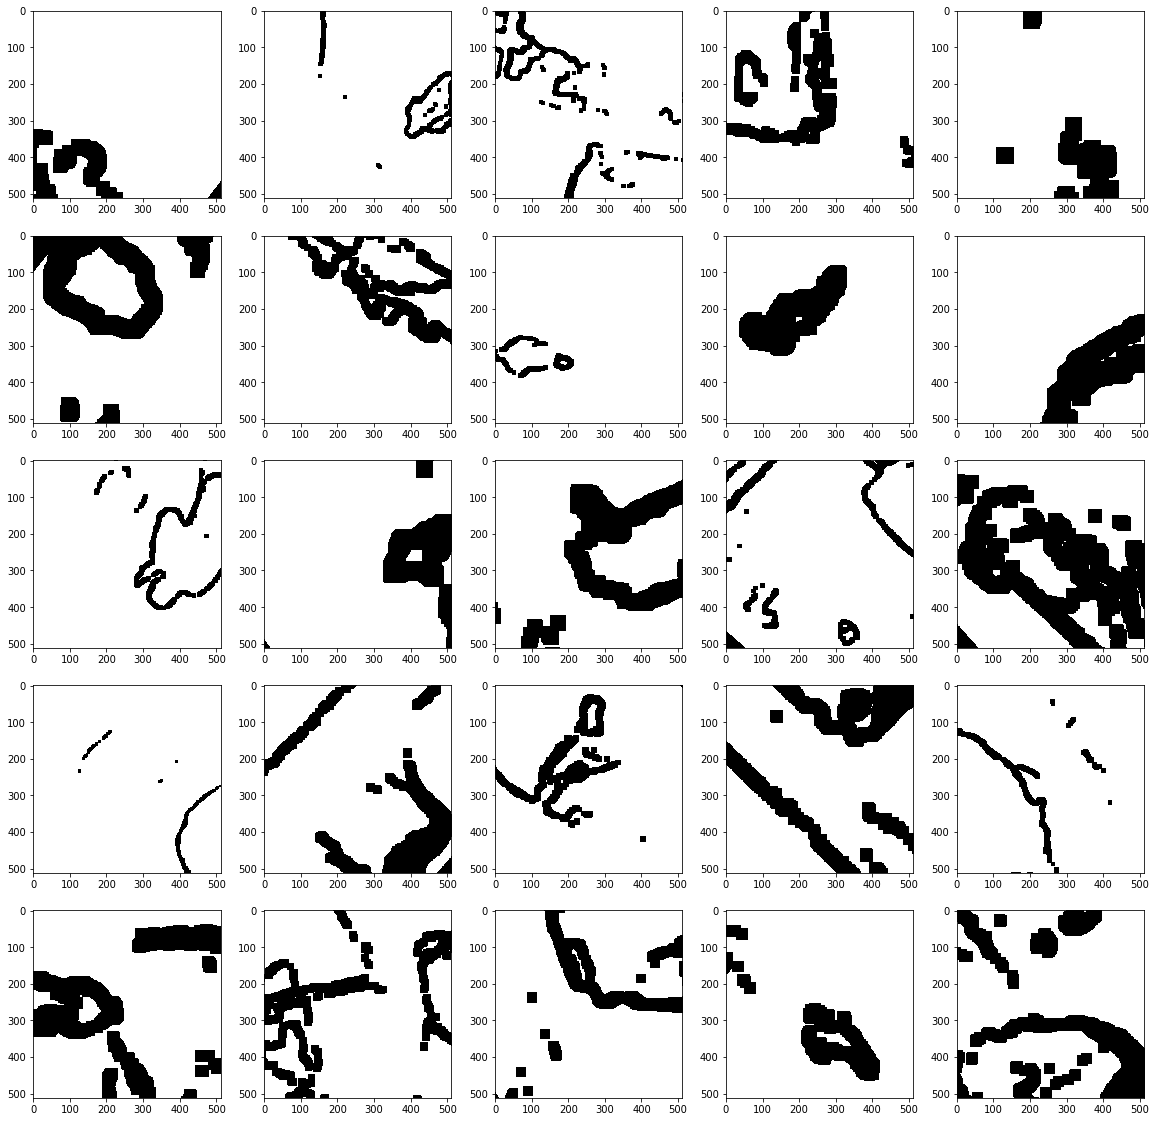

In [5]:
import cv2
import numpy as np

# Plot the results
_, axes = plt.subplots(5, 5, figsize=(20, 20))
axes = list(itertools.chain.from_iterable(axes))

for i in range(len(axes)):
    
    # Generate image
    img = load_mask(
        './data/masks/train/'+train_masks[np.random.randint(0, len(train_masks))], 
        512, 512,
        rotation=True,
        dilation=True,
        cropping=True
    )
    
    # Plot image on axis
    axes[i].imshow(img*255)